In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests
from geopy.geocoders import Nominatim

In [3]:

def getData(city, start=0, end=0):
  locator = Nominatim(user_agent="myGeocoder")
  location = locator.geocode(city)
  lat = location.latitude
  lon = location.longitude
  start = start
  end = end
  api_key = "7c3ee70966a7361a697fda3ca7a310ac"
  URL = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}"

  response = requests.get(URL)
  data = ""
  if(response.status_code == 200):
    data = response.json()
  else:
    data="!D"
  return data

In [4]:
city = "rourkela"
start = 1656637261
end = 1659691241
data = getData(city, start, end)

In [5]:
df = pd.DataFrame(data["list"])
df.head()

,main,components,dt
0,{'aqi': 4},"{'co': 447.27, 'no': 0.28, 'no2': 11.65, 'o3':...",1656640800
1,{'aqi': 4},"{'co': 467.3, 'no': 0.67, 'no2': 12.85, 'o3': ...",1656644400
2,{'aqi': 4},"{'co': 460.62, 'no': 1.26, 'no2': 17.31, 'o3':...",1656648000
3,{'aqi': 4},"{'co': 460.62, 'no': 1.2, 'no2': 20.56, 'o3': ...",1656651600
4,{'aqi': 4},"{'co': 473.98, 'no': 1.15, 'no2': 22.96, 'o3':...",1656655200


In [6]:
components = df["components"].apply(pd.Series)
type(components)

pandas.core.frame.DataFrame

In [7]:
components.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,447.27,0.28,11.65,9.03,7.63,29.33,32.42,0.94
1,467.30,0.67,12.85,16.09,9.78,30.47,33.26,0.70
2,460.62,1.26,17.31,30.40,16.93,31.63,33.84,0.02
3,460.62,1.20,20.56,40.05,20.03,34.40,36.44,0.00
4,473.98,1.15,22.96,45.42,22.17,35.41,37.26,0.00


In [8]:
main = df["main"].apply(pd.Series)
type(main)

pandas.core.frame.DataFrame

In [9]:
main.head()

,aqi
0,4
1,4
2,4
3,4
4,4


In [10]:
df.drop(["main", "components"], axis=1, inplace=True)

In [11]:
df.head()

,dt
0,1656640800
1,1656644400
2,1656648000
3,1656651600
4,1656655200


In [12]:
df = df.join(components).join(main)

In [13]:
df.head()

,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,1656640800,447.27,0.28,11.65,9.03,7.63,29.33,32.42,0.94,4
1,1656644400,467.30,0.67,12.85,16.09,9.78,30.47,33.26,0.70,4
2,1656648000,460.62,1.26,17.31,30.40,16.93,31.63,33.84,0.02,4
3,1656651600,460.62,1.20,20.56,40.05,20.03,34.40,36.44,0.00,4
4,1656655200,473.98,1.15,22.96,45.42,22.17,35.41,37.26,0.00,4


In [14]:
df.rename(columns={"dt": "date"}, inplace=True)

In [15]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,1656640800,447.27,0.28,11.65,9.03,7.63,29.33,32.42,0.94,4
1,1656644400,467.30,0.67,12.85,16.09,9.78,30.47,33.26,0.70,4
2,1656648000,460.62,1.26,17.31,30.40,16.93,31.63,33.84,0.02,4
3,1656651600,460.62,1.20,20.56,40.05,20.03,34.40,36.44,0.00,4
4,1656655200,473.98,1.15,22.96,45.42,22.17,35.41,37.26,0.00,4


In [16]:
df["date"] = pd.to_datetime(df["date"], unit="s")

In [17]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,2022-07-01 02:00:00,447.27,0.28,11.65,9.03,7.63,29.33,32.42,0.94,4
1,2022-07-01 03:00:00,467.30,0.67,12.85,16.09,9.78,30.47,33.26,0.70,4
2,2022-07-01 04:00:00,460.62,1.26,17.31,30.40,16.93,31.63,33.84,0.02,4
3,2022-07-01 05:00:00,460.62,1.20,20.56,40.05,20.03,34.40,36.44,0.00,4
4,2022-07-01 06:00:00,473.98,1.15,22.96,45.42,22.17,35.41,37.26,0.00,4


In [18]:
df.head(24)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,2022-07-01 02:00:00,447.27,0.28,11.65,9.03,7.63,29.33,32.42,0.94,4
1,2022-07-01 03:00:00,467.30,0.67,12.85,16.09,9.78,30.47,33.26,0.70,4
2,2022-07-01 04:00:00,460.62,1.26,17.31,30.40,16.93,31.63,33.84,0.02,4
3,2022-07-01 05:00:00,460.62,1.20,20.56,40.05,20.03,34.40,36.44,0.00,4
4,2022-07-01 06:00:00,473.98,1.15,22.96,45.42,22.17,35.41,37.26,0.00,4
5,2022-07-01 07:00:00,467.30,1.12,23.65,50.78,22.41,33.18,34.75,0.00,4
6,2022-07-01 08:00:00,453.95,0.67,22.96,53.64,22.65,29.39,30.66,0.00,4
7,2022-07-01 09:00:00,447.27,0.51,24.68,54.36,26.23,29.18,30.27,0.00,4
8,2022-07-01 10:00:00,467.30,0.80,27.08,52.93,30.04,32.88,33.83,0.00,4
9,2022-07-01 11:00:00,507.35,0.72,31.19,47.92,31.47,37.13,38.11,0.00,4


In [19]:
df.set_index("date", inplace=True)

In [20]:
df

,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
date,,,,,,,,,
2022-07-01 02:00:00,447.27,0.28,11.65,9.03,7.63,29.33,32.42,0.94,4
2022-07-01 03:00:00,467.30,0.67,12.85,16.09,9.78,30.47,33.26,0.70,4
2022-07-01 04:00:00,460.62,1.26,17.31,30.40,16.93,31.63,33.84,0.02,4
2022-07-01 05:00:00,460.62,1.20,20.56,40.05,20.03,34.40,36.44,0.00,4
2022-07-01 06:00:00,473.98,1.15,22.96,45.42,22.17,35.41,37.26,0.00,4
...,...,...,...,...,...,...,...,...,...
2022-08-05 05:00:00,377.18,1.33,8.14,71.53,12.88,59.25,61.88,0.00,5
2022-08-05 06:00:00,363.83,0.42,4.71,94.41,10.01,59.34,61.73,0.00,5
2022-08-05 07:00:00,343.80,0.18,3.04,97.28,7.21,51.50,53.47,0.00,5


# ```CO```

<AxesSubplot:xlabel='date'>

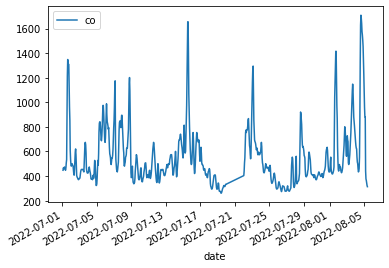

In [21]:
pd.DataFrame(df["co"]).plot()